<a href="https://colab.research.google.com/github/Naqeebullah11/Abasyn_Internship-ML/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plot

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load and Prepare Data


In [ ]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target (0,1,2)
target_names = iris.target_names

# 3. Normalize the Data (Important for PCA)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA for 2D (For Visualization + Classification)

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# 5. PCA Visualization (2D)


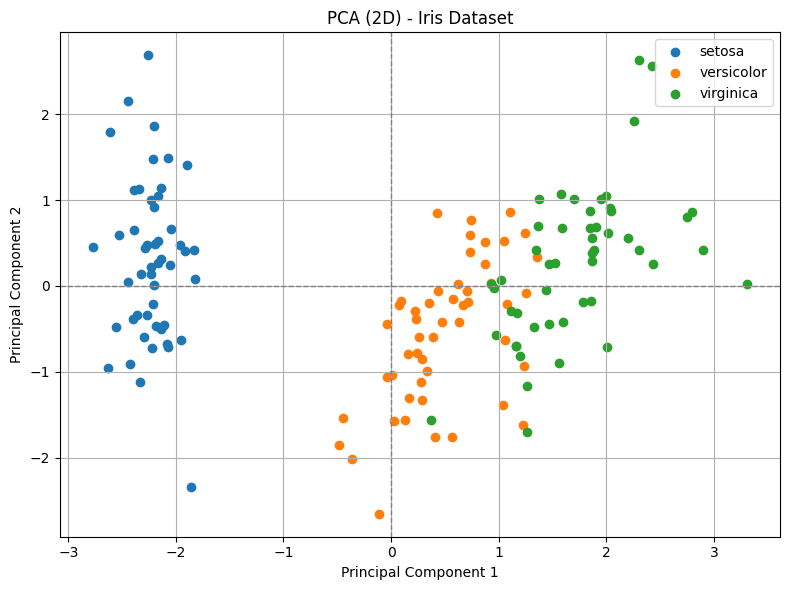

In [ ]:
plt.figure(figsize=(8, 6))
for i, name in enumerate(target_names):
    plt.scatter(X_pca_2d[y == i, 0], X_pca_2d[y == i, 1], label=name)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.title("PCA (2D) - Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. PCA Visualization (3D)


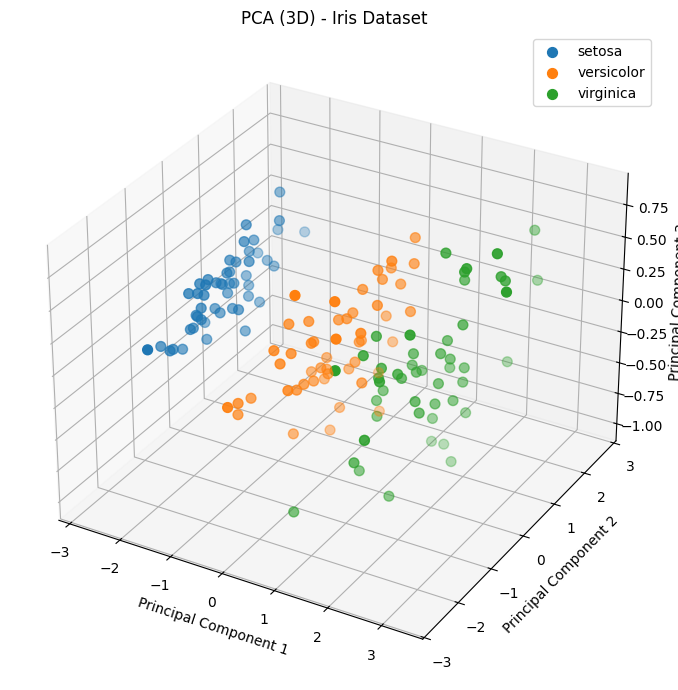

In [ ]:
# Apply PCA for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create 3D scatter plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each class in 3D
for i, name in enumerate(target_names):
    ax.scatter(
        X_pca_3d[y == i, 0],
        X_pca_3d[y == i, 1],
        X_pca_3d[y == i, 2],
        label=name,
        s=50
    )

# Axis labels and title
ax.set_title("PCA (3D) - Iris Dataset")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

ax.legend()
plt.tight_layout()
plt.show()


# 7. Train-Test Split on PCA (2D) Data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca_2d, y, test_size=0.2, random_state=42, stratify=y
)

# 8. Train KNN Classifier on PCA Data


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 9. Evaluation Metrics


=== Classification Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

=== Confusion Matrix ===


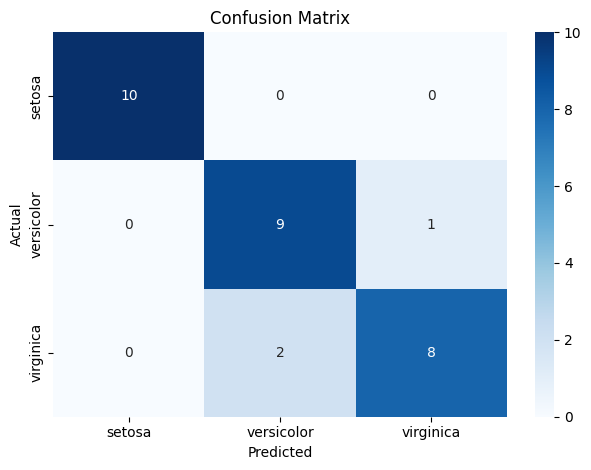

Accuracy: 0.90


In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=target_names))

print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")